In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

Reading the Data

In [ ]:
df = pd.read_csv('ECO221_Project_2025_Final.csv')
df1 = pd.read_csv('RF_DistrictWise_ECO221_2025.csv')
df2 = pd.read_csv('Salinity_Alkalinity_ECO221_2025.csv')

Selecting Only Sesamum

In [ ]:
sesamum_df = df[df['crop'] == 'Sesamum']

nan_counts = sesamum_df[['area1000hectares', 'production1000tonnes', 'irrigatedarea1000hectares']].isna().sum()
print("Number of NaN values in Sesamum crop data:")
print(nan_counts)

Number of NaN values in Sesamum crop data:
area1000hectares             46
production1000tonnes         46
irrigatedarea1000hectares    46
dtype: int64


In [ ]:
sesamum_df = sesamum_df.dropna(subset=[
    'area1000hectares',
    'production1000tonnes',
    'irrigatedarea1000hectares'
])

sesamum_df

,crop,area1000hectares,production1000tonnes,irrigatedarea1000hectares,districtcode,year,statecode,statename,nitrogenconsumptiontonnes,phosphateconsumptiontonnes,potashconsumptiontonnes,districtname
19,Sesamum,1.80,0.49,0.017,1,2017,14,Chhattisgarh,91447,53486,16993,Durg
30,Sesamum,2.70,0.76,0.000,2,2017,14,Chhattisgarh,21279,12584,4271,Bastar
62,Sesamum,1.52,0.43,0.080,3,2017,14,Chhattisgarh,92008,47721,15054,Raipur
87,Sesamum,2.54,0.73,0.000,4,2017,14,Chhattisgarh,72926,29713,6915,Bilaspur
100,Sesamum,2.72,1.07,0.010,5,2017,14,Chhattisgarh,31282,13620,3707,Raigarh
...,...,...,...,...,...,...,...,...,...,...,...,...
5757,Sesamum,0.89,0.36,1.742,913,2017,15,Jharkhand,15376,11091,1486,Hazaribagh
5773,Sesamum,0.18,0.08,0.004,914,2017,15,Jharkhand,427,297,82,Dhanbad
5801,Sesamum,8.38,2.96,0.019,915,2017,15,Jharkhand,16063,8959,1702,Palamau
5810,Sesamum,0.89,0.53,0.041,916,2017,15,Jharkhand,28893,20374,3949,Ranchi


NAN Values in RF

In [ ]:
nan_rf_rows = df1[df1['rf'].isna()]
print("\nNumber of rows with NaN in 'rf':", len(nan_rf_rows))


Number of rows with NaN in 'rf': 300


In **RF_DistrictWise_ECO221_2025**, there are states and districts that are not present in **ECO221_Project_2025_Final**. As a result, the average rainfall data may be biased for those districts and states that are not included in the rainfall dataset.

State Data

In [ ]:
print("state in df1 but not in df:")
print(set(df1['state']) - set(df['statename']))

state in df1 but not in df:
{'Tripura', 'Ladakh', 'Meghalaya', 'Jammu And Kashmir', 'Nagaland', 'Lakshadweep', 'Puducherry', 'Odisha', 'West Bengal', 'Mizoram', 'The Dadra And Nagar Haveli And Daman And Diu', 'Chandigarh', 'Goa', 'Manipur', 'Andaman And Nicobar Islands', 'Delhi', 'Sikkim', 'Arunachal Pradesh'}


In [ ]:
print("Districts in df but not in df1:")
print(set(df['districtname']) - set(df1['district']))

print("\nDistricts in df1 but not in df:")
print(set(df1['district']) - set(df['districtname']))

Districts in df but not in df1:
{'Allahabad', 'Santhal Paragana / Dumka', 'Hissar', 'Amarawati', 'Shahabad (now part of Bhojpur district)', 'Thirunelveli', 'Swami Madhopur', 'South Arcot / Cuddalore', 'Mungair', 'Belgaum', 'Sabarkantha', 'Pithorgarh', 'Vadodara / Baroda', 'Champaran', 'S.P.S. Nellore', 'Dangs', 'Bilashpur', 'Kodagu / Coorg', 'Bijapur / Vijayapura', 'Kanyakumari', 'Roopnagar / Ropar', 'Ahmedabad', 'Garhwal', 'Palamau', 'North Arcot / Vellore', 'Kadapa YSR', 'Bhatinda', 'Gurgaon', 'Gulbarga / Kalaburagi', 'Rae-Bareily', 'Visakhapatnam', 'Buland Shahar', 'Bangalore', 'Ramananthapuram', 'Mysore', 'Mahendragarh / Narnaul', 'Tiruchirapalli / Trichy', 'Ananthapur', 'Tumkur', 'Faizabad', 'Seoni / Shivani', 'Banaskantha', 'Ferozpur', 'Kanpur', 'Almorah', 'Singhbhum', 'Bellary', 'Lahul & Spiti'}

Districts in df1 but not in df:
{'Leparada', 'Central', 'Gopalganj', 'Baloda Bazar', 'Mirzapur', 'Samba', 'Tiruvannamalai', 'Maldah', 'Wokha', 'Sant Kabeer Nagar', 'East Garo Hills', 'S

Rainfall summary for the year 2017

In [ ]:
df1_cleaned = df1.dropna(subset=['rf'])

df1_summary = df1_cleaned.groupby(['state', 'district'])['rf'].agg(['sum', 'mean']).reset_index()
df1_summary.rename(columns={'sum': 'total_rainfall', 'mean': 'average_rainfall'}, inplace=True)

df_rf_summary = df1_cleaned.groupby(['district'])['rf'].sum().reset_index()
df_rf_summary.rename(columns={'rf': 'total_rf'}, inplace=True)

df1_summary = df1_summary.merge(df_rf_summary, on='district', how='left')

df1_summary

,state,district,total_rainfall,average_rainfall,total_rf
0,Andaman And Nicobar Islands,Nicobars,2760.667560,230.055630,2760.667560
1,Andaman And Nicobar Islands,North And Middle Andaman,3160.187640,263.348970,3160.187640
2,Andaman And Nicobar Islands,South Andamans,3360.942960,280.078580,3360.942960
3,Andhra Pradesh,Anantapur,597.170006,49.764167,597.170006
4,Andhra Pradesh,Chittoor,756.740003,63.061667,756.740003
...,...,...,...,...,...
693,West Bengal,Murshidabad,1565.190007,130.432501,1565.190007
694,West Bengal,Nadia,1736.770849,144.730904,1736.770849
695,West Bengal,Paschim Bardhaman,1768.240008,147.353334,1768.240008
696,West Bengal,Purba Bardhaman,1768.240008,147.353334,1768.240008


Mearging the file df and df1

In [ ]:
merged_df = sesamum_df.merge(df1_summary, left_on=['statename', 'districtname'], right_on=['state', 'district'], how='left')
merged_df.drop(columns=['state', 'district'], inplace=True)
merged_df


,crop,area1000hectares,production1000tonnes,irrigatedarea1000hectares,districtcode,year,statecode,statename,nitrogenconsumptiontonnes,phosphateconsumptiontonnes,potashconsumptiontonnes,districtname,total_rainfall,average_rainfall,total_rf
0,Sesamum,1.80,0.49,0.017,1,2017,14,Chhattisgarh,91447,53486,16993,Durg,861.629998,71.802500,861.629998
1,Sesamum,2.70,0.76,0.000,2,2017,14,Chhattisgarh,21279,12584,4271,Bastar,902.189990,75.182499,902.189990
2,Sesamum,1.52,0.43,0.080,3,2017,14,Chhattisgarh,92008,47721,15054,Raipur,683.989988,56.999166,683.989988
3,Sesamum,2.54,0.73,0.000,4,2017,14,Chhattisgarh,72926,29713,6915,Bilaspur,648.360000,54.030000,1857.730027
4,Sesamum,2.72,1.07,0.010,5,2017,14,Chhattisgarh,31282,13620,3707,Raigarh,624.520000,52.043333,624.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Sesamum,0.89,0.36,1.742,913,2017,15,Jharkhand,15376,11091,1486,Hazaribagh,1338.560021,111.546668,1338.560021
216,Sesamum,0.18,0.08,0.004,914,2017,15,Jharkhand,427,297,82,Dhanbad,1192.630021,99.385835,1192.630021
217,Sesamum,8.38,2.96,0.019,915,2017,15,Jharkhand,16063,8959,1702,Palamau,NaN,NaN,NaN
218,Sesamum,0.89,0.53,0.041,916,2017,15,Jharkhand,28893,20374,3949,Ranchi,1360.920004,113.410000,1360.920004


Merge data with district-level soil quality data

In [ ]:
merged_df_Soil = merged_df.merge(df2, left_on='districtname', right_on='District Name', how='left')
merged_df_Soil.rename(columns={'Average Salinity/Alkalinity (Percentage)': 'salinity_alkalinity_percent'}, inplace=True)
merged_df_Soil.drop(columns=['District Name'], inplace=True)
print(merged_df_Soil.head())

      crop  area1000hectares  production1000tonnes  irrigatedarea1000hectares  \
0  Sesamum              1.80                  0.49                      0.017   
1  Sesamum              2.70                  0.76                      0.000   
2  Sesamum              1.52                  0.43                      0.080   
3  Sesamum              2.54                  0.73                      0.000   
4  Sesamum              2.72                  1.07                      0.010   

   districtcode  year  statecode     statename  nitrogenconsumptiontonnes  \
0             1  2017         14  Chhattisgarh                      91447   
1             2  2017         14  Chhattisgarh                      21279   
2             3  2017         14  Chhattisgarh                      92008   
3             4  2017         14  Chhattisgarh                      72926   
4             5  2017         14  Chhattisgarh                      31282   

   phosphateconsumptiontonnes  potashconsumptionto

Make them in Excel file

In [ ]:
drive_folder = 'Testing_File_outputs'

if not os.path.exists(drive_folder):
    os.makedirs(drive_folder)

df1_summary.to_excel(os.path.join(drive_folder, 'df1_summary.xlsx'), index=False)
merged_df.to_excel(os.path.join(drive_folder, 'Task1.xlsx'), index=False)
merged_df_Soil.to_excel(os.path.join(drive_folder, 'Task2.xlsx'), index=False)


Couting the total no of dis

In [ ]:
unique_districts=df.groupby('statename')['districtname'].nunique()
unique_districts=pd.DataFrame(unique_districts)
unique_districts.reset_index(inplace=True)
unique_districts.columns=['statename','districtname']
print(unique_districts)

           statename  districtname
0     Andhra Pradesh            11
1              Assam             8
2              Bihar            10
3       Chhattisgarh             6
4            Gujarat            15
5            Haryana             7
6   Himachal Pradesh            10
7          Jharkhand             6
8          Karnataka            17
9             Kerala             9
10    Madhya Pradesh            35
11       Maharashtra            23
12            Punjab            11
13         Rajasthan            25
14        Tamil Nadu            11
15         Telangana             9
16     Uttar Pradesh            45
17       Uttarakhand             8


Ploting the Data

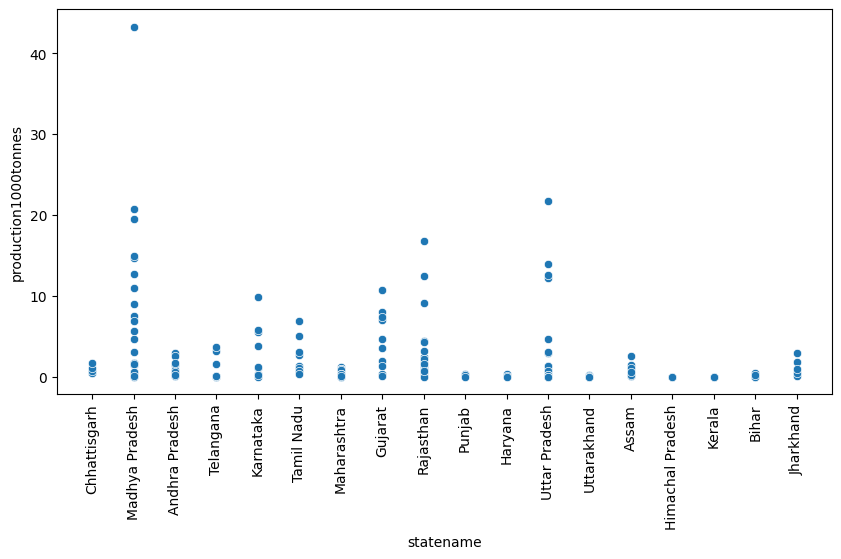

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='statename', y='production1000tonnes', data=merged_df)
# sns.scatterplot(x='statename', y='average_rainfall', data=merged_df)
plt.xticks(rotation=90)
plt.rc('font', size=6)
plt.show()

# Question 1:

Please provide a detailed summary of all the variables in your dataset.

###  **Production and Area Variables**

| Variable Name               | Description                                                                 | Units                   | Type      |
|----------------------------|-----------------------------------------------------------------------------|-------------------------|-----------|
| `production1000tonnes`     | Total crop output in the district                                           | 1000 tonnes             | Numeric   |
| `area1000hectares`         | Total area under the crop in the district                                   | 1000 hectares           | Numeric   |
| `irrigatedarea1000hectares`| Portion of area that is irrigated                                           | 1000 hectares           | Numeric   |
| `irrigated_area_new`       | Irrigated area + 1 (used to avoid log(0) in regression)                     | 1000 hectares           | Numeric   |
| `unirrigated_area`         | Total area - Irrigated area (new)                                           | 1000 hectares           | Numeric   |

---

###  **Fertilizer Input Variables**

| Variable Name                    | Description                                       | Units     | Type    |
|----------------------------------|---------------------------------------------------|-----------|---------|
| `nitrogenconsumptiontonnes`     | Nitrogen applied to crop                         | Tonnes    | Numeric |
| `phosphateconsumptiontonnes`    | Phosphate applied to crop                        | Tonnes    | Numeric |
| `potashconsumptiontonnes`       | Potash applied to crop                           | Tonnes    | Numeric |

*These were also log-transformed in your model as:*
- `log_nitrogen`, `log_phosphate`, `log_potash`

---

###  **Environmental Variables**

| Variable Name                    | Description                                          | Units      | Type    |
|----------------------------------|------------------------------------------------------|------------|---------|
| `total_rainfall`                 | Sum of monthly rainfall for 2017                     | Millimeters| Numeric |
| `average_rainfall`              | Average monthly rainfall for 2017                   | Millimeters| Numeric |
| `total_rf`                       | Alternate or rescaled total rainfall                | Millimeters| Numeric |
| `salinity_alkalinity_percent`   | % of land affected by soil salinity/alkalinity      | % (0–100)  | Numeric |

---

###  **Geographical Identifiers**

| Variable Name   | Description                         | Type     |
|----------------|-------------------------------------|----------|
| `districtname` | District name                       | Categorical |
| `statename`    | State name                          | Categorical |
| `year`         | Year (all observations = 2017)      | Integer     |

---

###  **Transformed (Log) Variables Used in Regression**

| Variable Name         | Description                               |
|----------------------|-------------------------------------------|
| `log_production`     | log of production1000tonnes               |
| `log_area`           | log of area1000hectares                   |
| `log_irrigated_area` | log of irrigated_area_new                 |
| `log_unirrigated_area` | log of unirrigated_area                 |



### Part A:

Cobb-Douglas Production Function
A Cobb-Douglas production function models output (𝑌) as a function of inputs (𝑋𝑘;𝑘=1,2,…𝐾) such that 𝑌=𝐴𝑋1𝛼1𝑋2𝛼2…𝑋𝐾𝛼𝐾 . Here 𝐴 represents the quality of the overall technology of the producer (farmer), and 𝛼𝑘 represents the effectiveness of the 𝑘𝑡ℎ input in influencing output. To estimate this using a regression model, we take a log of the equation and estimate a log-linear model.
Please note:
•
While environmental controls like weather and soils are included as part of the input vector, these are outside of a farmer’s control.
•
When running a log-linear model, you will need to account for zeroes in the 𝑖𝑟𝑟𝑖𝑔𝑎𝑡𝑒𝑑 𝑎𝑟𝑒𝑎 variable, you can do this by redefining 𝑖𝑟𝑟𝑖𝑔𝑎𝑡𝑒𝑑 𝑎𝑟𝑒𝑎 (𝑛𝑒𝑤)= 𝑖𝑟𝑟𝑖𝑔𝑎𝑡𝑒𝑑 𝑎𝑟𝑒𝑎+1 and including the new variable instead of the old one.
•
Further, define a new variable Unirrigated Area = Total Cropped Area - Irrigated Area (New) and include both irrigated and unirrigated area as part of the input vector.
•
Please include the environmental variables without taking a log.

# QUESTION 2
Using this data, estimate a Cobb-Douglas production function which models output (production in tonnes) as a function of inputs (e.g., area, irrigated area, fertilizer) and controls for the production environment (e.g., weather). Interpret your results paying careful attention to the units.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_excel("sesamum_data_final.xlsx")

df['log_production'] = np.log(df['production1000tonnes'])
df['log_area'] = np.log(df['area1000hectares'])
df['log_irrigated_area'] = np.log(df['irrigatedarea1000hectares'])
df['log_unirrigated_area'] = np.log(df['unirrigated_area'])
df['log_nitrogen'] = np.log(df['nitrogenconsumptiontonnes'] + 1)
df['log_phosphate'] = np.log(df['phosphateconsumptiontonnes'] + 1)
df['log_potash'] = np.log(df['potashconsumptiontonnes'] + 1)

env_vars = ['kharif', 'Average Salinity/Alkalinity (Percentage)']

X = df[['log_area', 'log_irrigated_area', 'log_unirrigated_area','log_nitrogen', 'log_phosphate', 'log_potash'] + env_vars]

X = X.replace([np.inf, -np.inf], np.nan).dropna()
df = df.loc[X.index]

Y = df['log_production']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         log_production   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     26.78
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           5.56e-22
Time:                        07:47:22   Log-Likelihood:                -126.31
No. Observations:                 112   AIC:                             270.6
Df Residuals:                     103   BIC:                             295.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Question 3:

Are there any outliers and/or influential observations? What are the collinearity diagnostics? How do they influence the estimation and interpretation?

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import OLSInfluence

influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

outlier_threshold = 2
outlier_indices = np.where(np.abs(standardized_residuals) > outlier_threshold)[0]

print(f"Outliers (|standardized residual| > {outlier_threshold}): {outlier_indices}")
#------------------------------------------------------------------------------------

print("\n--- INFLUENTIAL OBSERVATIONS ANALYSIS (DFBETA & DFFITS) ---\n")

influence = model.get_influence()

n = model.nobs
p = model.df_model + 1

dfbetas = influence.dfbetas
dfbeta_threshold = 2 / np.sqrt(n)
influential_dfbeta = (np.abs(dfbetas) > dfbeta_threshold).any(axis=1)
dfbeta_indices = np.where(influential_dfbeta)[0]
print(f"\n[DFBETA] Influential observations (>|{dfbeta_threshold:.3f}|): {len(dfbeta_indices)}")
if len(dfbeta_indices) > 0:
    print(f"Indices: {dfbeta_indices}")

dffits_values = influence.dffits
dffits_threshold = 2 * np.sqrt(p / n)


from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(model)

dffits_values = influence.dffits[0]
n = len(df)
k = X.shape[1]
dffits_threshold = 2 * np.sqrt(k / n)

influential_dffits = np.abs(dffits_values) > dffits_threshold
dffits_indices = np.where(influential_dffits)[0]

print(f"\n[DFFITS] Influential observations (>|{dffits_threshold:.3f}|): {len(dffits_indices)}")
if len(dffits_indices) > 0:
    print(f"Indices: {dffits_indices}")
    print("Influential districts:")
    print(df.iloc[dffits_indices][['districtname', 'production1000tonnes']])

combined_influential = np.union1d(dfbeta_indices, dffits_indices)
print(f"\n Total unique influential observations: {len(combined_influential)}")
if len(combined_influential) > 0:
    print("Indices:", combined_influential)

#------------------------------------------------------------------------------------------------

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = model.model.exog
feature_names = model.model.exog_names

vif_data = pd.DataFrame()
vif_data["Variable"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(X_vif, i) for i in range(len(feature_names))]

vif_data = vif_data[vif_data["Variable"] != "const"]

# Display
print("Variance Inflation Factors:")
print(vif_data)

print("We assessed collinearity using Variance Inflation Factors (VIF).The variables log_area and log_unirrigated_area had VIF values above 10, indicating severe multicollinearity. This is expected since these variables are mathematically dependent. log_nitrogen and log_phosphate also showed moderate multicollinearity. Multicollinearity inflates standard errors, making some coefficients statistically insignificant or unstable, even if they are economically relevant. To improve interpretation, we may consider removing redundant predictors such as log_unirrigated_area ")


Outliers (|standardized residual| > 2): [13 24 41 80 82 96 97]

--- INFLUENTIAL OBSERVATIONS ANALYSIS (DFBETA & DFFITS) ---


[DFBETA] Influential observations (>|0.189|): 19
Indices: [ 13  14  16  22  27  32  41  60  70  73  80  82  89  94  96  97  99 107
 111]

[DFFITS] Influential observations (>|0.681|): 10
Indices: [ 13  14  32  41  73  80  82  96  97 107]
Influential districts:
              districtname  production1000tonnes
14              Chhatarpur             43.290001
15                   Panna             19.580000
43                 Kurnool              0.560000
68   Gulbarga / Kalaburagi              9.840000
119              Dungarpur              0.280000
128                   Pali             12.500000
131                 Sirohi              0.040000
162               Hamirpur             12.280000
163               Hamirpur             12.280000
197          Karbi Anglong              2.580000

 Total unique influential observations: 19
Indices: [ 13  14  16  22  27 

# Question 4:

Visualize the model residuals on a plot having the crop production on Y-axis and crop area on the X-axis. Now, construct a second plot having the residuals on the Y-axis and crop area on x-axis. Are the plots, what you would expect? Explain. Plot a histogram of residuals and verify that the sum of the residuals is zero.

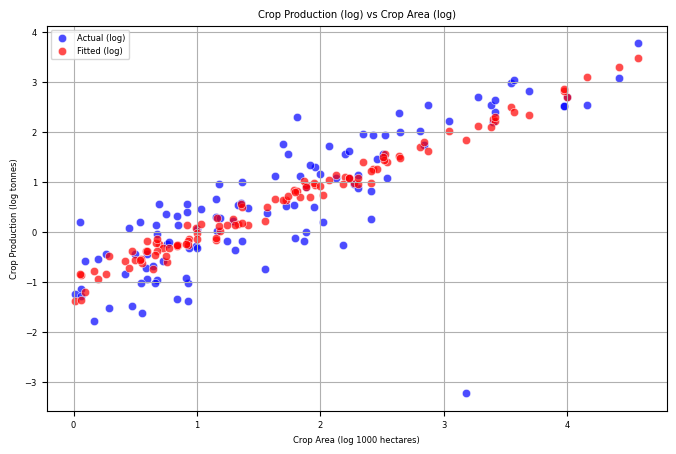

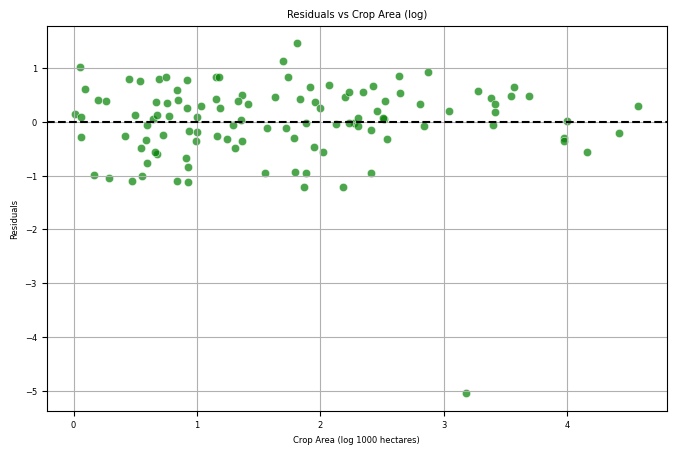

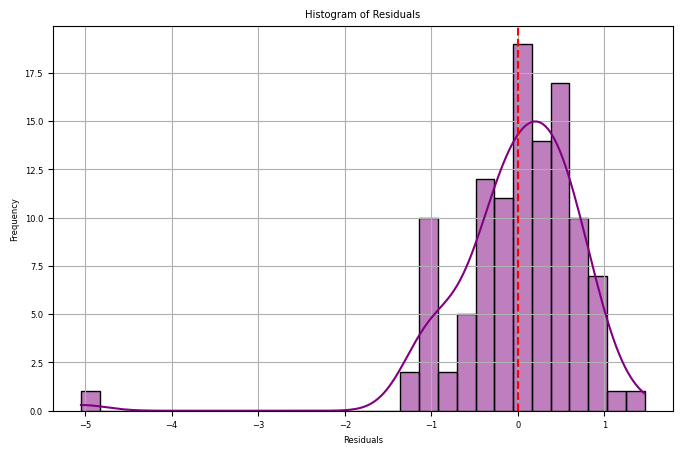

Sum of residuals: 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

area = df['log_area']
actual = df['log_production']
predicted = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=area, y=actual, label="Actual (log)", color="blue", alpha=0.7)
sns.scatterplot(x=area, y=predicted, label="Fitted (log)", color="red", alpha=0.7)
plt.title("Crop Production (log) vs Crop Area (log)")
plt.xlabel("Crop Area (log 1000 hectares)")
plt.ylabel("Crop Production (log tonnes)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=area, y=residuals, color="green", alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals vs Crop Area (log)")
plt.xlabel("Crop Area (log 1000 hectares)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
print("Sum of residuals:", np.sum(residuals).round(6))


# Question 5

Based on your estimates, what can you say about the returns to scale for the production function? Test the hypothesis that inputs within the farmer’s control (i.e., excluding controls for production environment) exhibit constant returns to scale. Clearly state the null and alternate hypotheses.

This code tests whether the Cobb-Douglas production function exhibits constant returns to scale (CRS) by summing the estimated coefficients of the farmer-controlled inputs and conducting a hypothesis test.

Hypotheses
Null Hypothesis (H₀): The sum of the input coefficients = 1 (Constant Returns to Scale).

Alternative Hypothesis (H₁): The sum of the input coefficients ≠ 1 (Increasing or Decreasing Returns to Scale).

In [ ]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
controlled_inputs = ['log_area', 'log_irrigated_area', 'log_unirrigated_area', 'log_nitrogen', 'log_phosphate', 'log_potash']
beta_sum = sum(model.params[controlled_inputs])

cov_matrix = model.cov_params()
se_beta_sum = np.sqrt(sum(cov_matrix.loc[var, var] for var in controlled_inputs))

t_stat = (beta_sum - 1) / se_beta_sum
p_value = 2 * (1 - norm.cdf(abs(t_stat)))

print(f"Sum of farmer-controlled input coefficients: {beta_sum:.4f}")
print(f"Standard error: {se_beta_sum:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The production function does NOT exhibit constant returns to scale.")
else:
    print("Fail to reject the null hypothesis: The production function exhibits constant returns to scale.")


Sum of farmer-controlled input coefficients: 1.2137
Standard error: 0.5580
T-statistic: 0.3830
P-value: 0.7017
Fail to reject the null hypothesis: The production function exhibits constant returns to scale.


Interpretation
If p-value < 0.05, CRS is rejected → increasing or decreasing returns to scale.

If p-value ≥ 0.05, CRS is not rejected → constant returns to scale.

# Part B: Quadratic Production Function

Another popular production function is a quadratic production function which models output
(𝑌) as a function of inputs (𝑋𝑘 ; 𝑘 = 1,2, … 𝐾) such that 𝑌 = 𝛽0 + 𝛽1𝑋1 + 𝛽2𝑋1
2 + 𝛽2𝑋2 +
𝛽3𝑋2
2 …. In this case both the dependent and independent variables are in levels with an
inclusion of squared input terms to account for the diminishing effectiveness of inputs in
influencing output beyond a certain threshold. You may assume that input use is always
positive.

# Question 6:
As mentioned above, we expect that the impact of an additional unit of area/ input(s) on
output is lower as the area/ input(s) levels increase beyond a threshold (this is known as
diminishing marginal product of inputs). How would you test this hypothesis? Clearly state
the null and alternate hypotheses for each input and augment the model to test the same.
Summarize your findings.

Testing for Diminishing Marginal Product of Inputs
The hypothesis of diminishing marginal product of inputs suggests that the effect of an additional unit of an input on output decreases as input levels increase. This can be tested by checking whether the squared terms of inputs have a negative and statistically significant effect on output.

Formulating Hypotheses
For each input variable
𝑋
𝑘
X
k
​
 , we test:

Null Hypothesis (
𝐻
0
H
0
​
 ): The squared term of the input (
𝑋
𝑘
2
X
k
2
​
 ) has no effect or a positive effect on output.

𝐻
0
:
𝛽
𝑘
2
≥
0
H
0
​
 :β
k2
​
 ≥0
Alternative Hypothesis (
𝐻
1
H
1
​
 ): The squared term of the input (
𝑋
𝑘
2
X
k
2
​
 ) has a negative effect on output (indicating diminishing returns).

𝐻
1
:
𝛽
𝑘
2
<
0
H
1
​
 :β
k2
​
 <0


Q6

In [ ]:
import pandas as pd
import statsmodels.api as sm

df_quad = sesamum_df.dropna(subset=[
    'production1000tonnes', 'area1000hectares',
    'irrigatedarea1000hectares',
    'nitrogenconsumptiontonnes', 'phosphateconsumptiontonnes', 'potashconsumptiontonnes'
]).copy()

df_quad['unirrigatedarea1000hectares'] = df_quad['area1000hectares'] - df_quad['irrigatedarea1000hectares']

df_quad['area_sq'] = df_quad['area1000hectares']**2
df_quad['irrigated_sq'] = df_quad['irrigatedarea1000hectares']**2
df_quad['unirrigated_sq'] = df_quad['unirrigatedarea1000hectares']**2
df_quad['nitrogen_sq'] = df_quad['nitrogenconsumptiontonnes']**2
df_quad['phosphate_sq'] = df_quad['phosphateconsumptiontonnes']**2
df_quad['potash_sq'] = df_quad['potashconsumptiontonnes']**2

X = df_quad[[
    'area1000hectares', 'area_sq',
    'irrigatedarea1000hectares', 'irrigated_sq',
    'unirrigatedarea1000hectares', 'unirrigated_sq',
    'nitrogenconsumptiontonnes', 'nitrogen_sq',
    'phosphateconsumptiontonnes', 'phosphate_sq',
    'potashconsumptiontonnes', 'potash_sq'
]]

X = sm.add_constant(X)
y = df_quad['production1000tonnes']

model_quad = sm.OLS(y, X).fit()

print(model_quad.summary())


                             OLS Regression Results                             
Dep. Variable:     production1000tonnes   R-squared:                       0.841
Model:                              OLS   Adj. R-squared:                  0.833
Method:                   Least Squares   F-statistic:                     100.1
Date:                  Mon, 21 Apr 2025   Prob (F-statistic):           9.82e-77
Time:                          20:20:00   Log-Likelihood:                -451.72
No. Observations:                   220   AIC:                             927.4
Df Residuals:                       208   BIC:                             968.2
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Q7

In [ ]:
import statsmodels.api as sm
df_quad['irrigation_nitrogen'] = df_quad['irrigatedarea1000hectares'] * df_quad['nitrogenconsumptiontonnes']
df_quad['irrigation_phosphate'] = df_quad['irrigatedarea1000hectares'] * df_quad['phosphateconsumptiontonnes']
df_quad['irrigation_potash'] = df_quad['irrigatedarea1000hectares'] * df_quad['potashconsumptiontonnes']

X_inter = df_quad[[
    'irrigatedarea1000hectares',
    'nitrogenconsumptiontonnes', 'phosphateconsumptiontonnes', 'potashconsumptiontonnes',
    'irrigation_nitrogen', 'irrigation_phosphate', 'irrigation_potash'
]]

X_inter = sm.add_constant(X_inter)
y_inter = df_quad['production1000tonnes']

model_inter = sm.OLS(y_inter, X_inter).fit()

print(model_inter.summary())


                             OLS Regression Results                             
Dep. Variable:     production1000tonnes   R-squared:                       0.077
Model:                              OLS   Adj. R-squared:                  0.047
Method:                   Least Squares   F-statistic:                     2.539
Date:                  Mon, 21 Apr 2025   Prob (F-statistic):             0.0158
Time:                          20:24:51   Log-Likelihood:                -645.20
No. Observations:                   220   AIC:                             1306.
Df Residuals:                       212   BIC:                             1334.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


Q8

In [ ]:

X = df_clean[['area1000hectares', 'irrigatedarea1000hectares', 'nitrogenconsumptiontonnes',
              'phosphateconsumptiontonnes', 'potashconsumptiontonnes']]

region_dummies = pd.get_dummies(df_clean['region'], drop_first=True, dtype=float)

X = pd.concat([X, region_dummies], axis=1)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     production1000tonnes   R-squared:                       0.839
Model:                              OLS   Adj. R-squared:                  0.823
Method:                   Least Squares   F-statistic:                     53.90
Date:                  Mon, 21 Apr 2025   Prob (F-statistic):           1.10e-29
Time:                          20:26:08   Log-Likelihood:                -217.37
No. Observations:                    92   AIC:                             452.7
Df Residuals:                        83   BIC:                             475.4
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
